<a href="https://colab.research.google.com/github/odam2323/weldingQualityMachineLearning/blob/main/supportVectorMachineModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1A9dhO0gYByNJf9ya0SZmeCzZIeepRhsO" alt = "Encabezado MLDS" width = "100%">  </img>

# **Modelamiento y Validación**
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---



1. Sarah Fonseca C.C.: 1032487465
2. Christian Camilo Barriga C.C.: 1023860937
3. Andrés Serrano C.C.: 1026574836

### **0.1 Carga de datos**
---

Antes de comenzar con la carga de datos, es importante mencionar que el presente proyecto usará imagenes de una biblioteca personal, por lo que extraeremos las imagenes de nuestras carpetas de google drive, como se muestra a continuación.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Como tal, es importante tener en cuenta que dividimos las imagenes en dos, según sean consideradas buenas muestras de soldadura, o malas muestras.

In [ ]:
BASE_PATH = '/content/drive/MyDrive/clasificador_soldadura/data'
RAW_GOOD_PATH = os.path.join(BASE_PATH, '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good')
RAW_BAD_PATH = os.path.join(BASE_PATH, '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad')

PROCESSED_IMG_PATH = os.path.join(BASE_PATH, 'processed_data')
PROCESSED_GOOD_PATH = os.path.join(PROCESSED_IMG_PATH, 'good')
PROCESSED_BAD_PATH = os.path.join(PROCESSED_IMG_PATH, 'bad')

posteriormente verificamos que existna las carpetas en cuestión.

In [ ]:
def verify_path(path: str):
  if not os.path.exists(path):
    print(f"Error: La carpeta no existe en {path}")
    return False
  else:
    return True

In [ ]:
verify_path(PROCESSED_GOOD_PATH)

True

In [ ]:
verify_path(PROCESSED_BAD_PATH)

True

A continuación se presenta una serie de funciones auxiliares para el trabajo con las imagenes.

In [ ]:
# Funciones auxiliares
def is_valid_img(filename: str):
    """Verifica si el archivo es una imagen válida"""
    return filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))

def get_img_size(path: str):
    """Obtiene las dimensiones de la imagen"""
    with Image.open(path) as img:
        return img.size

def img_to_record(directory: str, filename: str, label: int):
    """Crea un registro con la información de la imagen"""
    width, height = get_img_size(os.path.join(directory, filename))
    return [filename, width, height, label]

def img_to_grayscale_array(filepath: str, resize_to=None):
    """Convierte la imagen a escala de grises y opcionalmente la redimensiona"""
    with Image.open(filepath) as img:
        img_gray = img.convert('L')
        if resize_to:
            img_gray = img_gray.resize(resize_to, Image.Resampling.LANCZOS)
        return np.array(img_gray)

def procesar_y_mostrar_imagen(ruta_imagen, clasificacion, mostrar_img=False):
    """Procesa la imagen y la muestra (opcional)"""
    try:
        # Abrir y convertir a blanco y negro
        imagen_color = Image.open(ruta_imagen)
        imagen_bn = imagen_color.convert('L')

        # Obtener el nombre del archivo sin extensión para el guardado
        nombre_base = os.path.splitext(os.path.basename(ruta_imagen))[0]
        nombre_guardado = f"{nombre_base}_bn.jpeg"

        # Guardar la imagen en blanco y negro
        imagen_bn.save(nombre_guardado)

        # Mostrar la imagen
        if mostrar_img:
          plt.figure(figsize=(6, 4))
          plt.imshow(imagen_bn, cmap='gray')
          plt.title(f"{clasificacion.upper()} - {os.path.basename(ruta_imagen)}")
          plt.axis('off')
          plt.show()

        print(f"Procesada: {os.path.basename(ruta_imagen)} : {clasificacion.upper()}")
        return True

    except Exception as e:
        print(f"✗ Error procesando {ruta_imagen}: {e}")
        return False

### **0.2. Resumen General**
---
Con la intención de poder realizar el informe siguiente, acá estará resumido el codigo desde el cual podemos convertir imagenes en datos para su posterior analisis. Es importante tener en cuenta que el preprocesado y limpieza de la data fue realizado en fases previas de este proyecto, por lo que en la fase actual trabajaremos directamente sobre imagenes ya procesadas y no data cruda.

In [ ]:
# Procesar imágenes GOOD (label = 1)

print("Imagenes GOOD")


valid_good_imgs = list(filter(is_valid_img, os.listdir(PROCESSED_GOOD_PATH)))
good_records = []

for filename in valid_good_imgs:
    if procesar_y_mostrar_imagen(os.path.join(PROCESSED_GOOD_PATH, filename), "GOOD", False):
        record = img_to_record(PROCESSED_GOOD_PATH, filename, 1)  # Label 1 para GOOD
        good_records.append(record)

Imagenes GOOD
Procesada: 1A8.png : GOOD
Procesada: 1A1.png : GOOD
Procesada: 1A9.png : GOOD
Procesada: 1A2.png : GOOD
Procesada: 1A6.png : GOOD
Procesada: 1A7.png : GOOD
Procesada: 1A3.png : GOOD
Procesada: 1A5.png : GOOD
Procesada: 1A4.png : GOOD
Procesada: 1A0.png : GOOD
Procesada: 1A11.png : GOOD
Procesada: 1B0.png : GOOD
Procesada: 1B2.png : GOOD
Procesada: 1B1.png : GOOD
Procesada: 1B5.png : GOOD
Procesada: 1A10.png : GOOD
Procesada: 1B6.png : GOOD
Procesada: 1B3.png : GOOD
Procesada: 1B4.png : GOOD
Procesada: 1B7.png : GOOD
Procesada: 1B9.png : GOOD
Procesada: 1B8.png : GOOD
Procesada: 2A2.png : GOOD
Procesada: 2A4.png : GOOD
Procesada: 2A0.png : GOOD
Procesada: 2A3.png : GOOD
Procesada: 2A5.png : GOOD
Procesada: 2A1.png : GOOD
Procesada: 2A6.png : GOOD
Procesada: 2B0.png : GOOD
Procesada: 2A8.png : GOOD
Procesada: 2B2.png : GOOD
Procesada: 2B5.png : GOOD
Procesada: 2A7.png : GOOD
Procesada: 2B4.png : GOOD
Procesada: 2B3.png : GOOD
Procesada: 2B1.png : GOOD
Procesada: 2B7.png : G

In [ ]:
# Procesar imágenes BAD (label = 0)

print("Imagenes BAD ")


valid_bad_imgs = list(filter(is_valid_img, os.listdir(PROCESSED_BAD_PATH)))
bad_records = []

for filename in valid_bad_imgs:
    if procesar_y_mostrar_imagen(os.path.join(PROCESSED_BAD_PATH, filename), "BAD", False):
        record = img_to_record(PROCESSED_BAD_PATH, filename, 0)  # Label 0 para BAD
        bad_records.append(record)

Imagenes BAD 
Procesada: 13A4.png : BAD
Procesada: 12A1.png : BAD
Procesada: 12B1.png : BAD
Procesada: 12B4.png : BAD
Procesada: 12A8.png : BAD
Procesada: 13B3.png : BAD
Procesada: 13A2.png : BAD
Procesada: 13A7.png : BAD
Procesada: 12A9.png : BAD
Procesada: 12B2.png : BAD
Procesada: 12B8.png : BAD
Procesada: 13A5.png : BAD
Procesada: 13A1.png : BAD
Procesada: 13B1.png : BAD
Procesada: 12B3.png : BAD
Procesada: 13B0.png : BAD
Procesada: 13A0.png : BAD
Procesada: 12B9.png : BAD
Procesada: 13B8.png : BAD
Procesada: 13B9.png : BAD
Procesada: 13B7.png : BAD
Procesada: 12B5.png : BAD
Procesada: 12B7.png : BAD
Procesada: 12B6.png : BAD
Procesada: 12A7.png : BAD
Procesada: 13A6.png : BAD
Procesada: 12A4.png : BAD
Procesada: 13A3.png : BAD
Procesada: 13B5.png : BAD
Procesada: 12A6.png : BAD
Procesada: 13B6.png : BAD
Procesada: 13A9.png : BAD
Procesada: 13A8.png : BAD
Procesada: 12A3.png : BAD
Procesada: 13B2.png : BAD
Procesada: 11B1.png : BAD
Procesada: 12A5.png : BAD
Procesada: 11A9.png : BA

A continuación ordenaremos la información de las imagenes en datasets para así poder realizar una exposición como tal de estos archivos.

In [ ]:
df_good = pd.DataFrame(good_records, columns=["filename", "width", "height", "label"])
df_bad = pd.DataFrame(bad_records, columns=["filename", "width", "height", "label"])

df_completo = pd.concat([df_good, df_bad], ignore_index=True)

df_completo['clasificacion'] = df_completo['label'].map({1: 'GOOD', 0: 'BAD'})

print("dataset completo")

print(f"Total de imágenes procesadas: {len(df_completo)}")
print(f"Imágenes GOOD (1): {len(df_good)}")
print(f"Imágenes BAD (0): {len(df_bad)}")

print("\nDataset Good:")
display(df_good.head())

print("\nDataset Bad:")
display(df_bad.head())

print("\nDataset Combinado:")
display(df_completo.head())

# Estadísticas del dataset
print("estadísticas del dataset")

print(f"Dimensiones del dataset: {df_completo.shape}")
print(f"\nDistribución de labels:")
print(df_completo['label'].value_counts())
print(f"\nDistribución de clasificaciones:")
print(df_completo['clasificacion'].value_counts())

print(f"\nEstadísticas de dimensiones de imágenes:")
print(f"Ancho promedio: {df_completo['width'].mean():.1f} px")
print(f"Alto promedio: {df_completo['height'].mean():.1f} px")
print(f"Ancho mínimo: {df_completo['width'].min()} px")
print(f"Ancho máximo: {df_completo['width'].max()} px")
print(f"Alto mínimo: {df_completo['height'].min()} px")
print(f"Alto máximo: {df_completo['height'].max()} px")

# Guardar el dataset completo
df_completo.to_csv('dataset_imagenes_clasificadas.csv', index=False)
print(f"\n✓ Dataset guardado en 'dataset_imagenes_clasificadas.csv'")

dataset completo
Total de imágenes procesadas: 180
Imágenes GOOD (1): 60
Imágenes BAD (0): 120

Dataset Good:


,filename,width,height,label
0,1A8.png,1895,267,1
1,1A1.png,1796,276,1
2,1A9.png,1939,343,1
3,1A2.png,1765,335,1
4,1A6.png,1830,301,1



Dataset Bad:


,filename,width,height,label
0,13A4.png,1748,357,0
1,12A1.png,1827,203,0
2,12B1.png,1884,191,0
3,12B4.png,1830,253,0
4,12A8.png,1775,250,0



Dataset Combinado:


,filename,width,height,label,clasificacion
0,1A8.png,1895,267,1,GOOD
1,1A1.png,1796,276,1,GOOD
2,1A9.png,1939,343,1,GOOD
3,1A2.png,1765,335,1,GOOD
4,1A6.png,1830,301,1,GOOD


estadísticas del dataset
Dimensiones del dataset: (180, 5)

Distribución de labels:
label
0    120
1     60
Name: count, dtype: int64

Distribución de clasificaciones:
clasificacion
BAD     120
GOOD     60
Name: count, dtype: int64

Estadísticas de dimensiones de imágenes:
Ancho promedio: 1852.8 px
Alto promedio: 303.1 px
Ancho mínimo: 1705 px
Ancho máximo: 2125 px
Alto mínimo: 162 px
Alto máximo: 548 px

✓ Dataset guardado en 'dataset_imagenes_clasificadas.csv'


De esta manera, el anterior codigo nuos muestras la cantidad de imagenes que se poseen, mostrandonos el tamaño del conjunto de datos y las divisiones de estas imagenes entre buenas y malas muestras.

Ahora bien, en una segunda parte, podemos analizar estas imagenes en tanto datos, para ello aplicaremos un histogram oriented gradient (HOG), tal y como mostraremos a continuación, comenzando por unas funciones que serán aplicadas para esto.



In [ ]:
from collections import Counter

def summarize_image_formats(folder):
    formats = []
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')):
            try:
                with Image.open(os.path.join(folder, f)) as img:
                    formats.append(img.format)
            except:
                pass
    return Counter(formats)

print("Formatos en good:", summarize_image_formats(PROCESSED_GOOD_PATH))
print("Formatos en bad:", summarize_image_formats(PROCESSED_BAD_PATH))

Formatos en good: Counter({'PNG': 60})
Formatos en bad: Counter({'PNG': 120})


Con el anterior fragmento de codigo verificamos que todas las imagenes están en formato `.png` siendo el formato más adecuado para los analisis que realizaremos posteriormente. Este formato conserva de forma adecuada bordes y gradientes de las imagenes, lo que nos interesa para el Histogram of Oriented Gradients (HOG), que abordaremos posteriormente.

In [ ]:
from skimage.feature import hog

def img_processing_hog_features(path: str, resize_to = (200, 200)):
  """Extrae las características HOG de una imagen dada."""
  img_array = img_to_grayscale_array(path, resize_to)
  hog_features = hog(
      img_array,
      orientations=9,
      pixels_per_cell=(8,8),
      cells_per_block=(2,2),
      visualize=False,
      block_norm='L2-Hys'
  )
  return hog_features

In [ ]:
from skimage.feature import hog

def build_hog_dataset(resize_to=(200,200)):
  """Crea un dataset de características HOG para imágenes 'good' y 'bad'."""

  def img_processing_hog_features(path: str, resize_to = (200, 200)):
    """Extrae las características HOG de una imagen dada."""
    img_array = img_to_grayscale_array(path, resize_to)
    hog_features = hog(
        img_array,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        visualize=False,
        block_norm='L2-Hys'
    )
    return hog_features

  def get_features(path, label):
    """Obtiene las features HOG de todas las imágenes .png en una carpeta."""
    files = [f for f in os.listdir(path) if f.lower().endswith('.png')]
    return [
        {
            "filename": f,
            "label": label,
            "hog_features": img_processing_hog_features(os.path.join(path, f), resize_to)
        }
        for f in files
    ]

  good_records = get_features(PROCESSED_GOOD_PATH, 'GOOD')
  bad_records = get_features(PROCESSED_BAD_PATH, 'BAD')
  all_records = good_records + bad_records

  df = pd.DataFrame([
      {
          "filename": r["filename"],
          "label": r["label"],
          **{f"hog_{i}": val for i, val in enumerate(r["hog_features"])}
      }
      for r in all_records
  ])

  print(f"Total imágenes procesadas: {len(df)}")
  print(f"Dimensiones del dataset HOG: {df.shape}")
  return df

In [ ]:
hog_df = build_hog_dataset()
hog_df.to_csv("hog_features_dataset.csv", index=False)

Total imágenes procesadas: 180
Dimensiones del dataset HOG: (180, 20738)


In [ ]:
hog_df.tail()

,filename,label,hog_0,hog_1,hog_2,hog_3,hog_4,hog_5,hog_6,hog_7,...,hog_20726,hog_20727,hog_20728,hog_20729,hog_20730,hog_20731,hog_20732,hog_20733,hog_20734,hog_20735
175,16B6.png,BAD,0.455200,0.123420,0.000000,0.0,0.032425,0.0,0.031725,0.215806,...,0.147416,0.291558,0.017901,0.028405,0.013716,0.026654,0.000000,0.024605,0.291558,0.291558
176,16B7.png,BAD,0.361561,0.017447,0.007686,0.0,0.021738,0.0,0.000000,0.015293,...,0.122450,0.265295,0.146997,0.000000,0.015973,0.037165,0.050031,0.083725,0.100641,0.192220
177,16B8.png,BAD,0.473918,0.049781,0.000000,0.0,0.019139,0.0,0.000000,0.073259,...,0.286980,0.215441,0.286980,0.171148,0.042034,0.071193,0.020255,0.046735,0.045029,0.094501
178,16B4.png,BAD,0.414204,0.034825,0.000000,0.0,0.021394,0.0,0.008450,0.068071,...,0.069516,0.306933,0.049233,0.012150,0.026063,0.090316,0.048287,0.054611,0.038191,0.306933
179,16B9.png,BAD,0.307421,0.010644,0.000000,0.0,0.020261,0.0,0.003737,0.022461,...,0.265123,0.265123,0.123114,0.008190,0.002387,0.012832,0.006959,0.005909,0.053923,0.265123


El HOG divide cada imagen en celdas de 8x8 píxeles agrupadas en bloques de 2x2 celdas. Para llegar a esto, cada imagen es convertida a escala de grises y redimensionada, para luego normalizar todas las imagenes L2-norm. Todo esto tiene como resultado de que se retornan las imagenes interpretadas como vectores numericos que son analizables como datos.

A su vez, se crea también un dataset completo con caracteristicas HOG de todas las imagenes, guardandolas también por nombre del archivo y etiquieta. Para este dataframe, se convierte cada vector HOG en columnas individuales (hog_0, hog_1, etc.) con caracteristicas numéricas, que suman un total de 20735, mientras que cada fila representa una imagen de nuestros archivos personales. El resultado final de esto es un CSV con un dataset listo, en donde lo importante del HOG en este caso es que este permite la detección de patrones (texturas, formas, bordes), por lo que nos será útil para entrenar modelos de ML que sean sensibles a la "forma" y "estructura" de las imágenes.

A continuación observemos una interpretación gráfica de cómo terminan constituyendose las imagenes ya luego de haber aplicado el HOG.


In [ ]:
from skimage import color

def visualize_hog_example(image_path, resize_to=(200,200)):
    """Muestra la imagen original y su representación HOG visualizada."""
    img_array = img_to_grayscale_array(image_path, resize_to)

    hog_features, hog_image = hog(
        img_array,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        visualize=True,
        block_norm='L2-Hys'
    )

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img_array, cmap='gray')
    ax[0].set_title('Imagen original')
    ax[0].axis('off')

    ax[1].imshow(hog_image, cmap='inferno')
    ax[1].set_title('Visualización HOG')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Longitud del vector HOG: {len(hog_features)}")

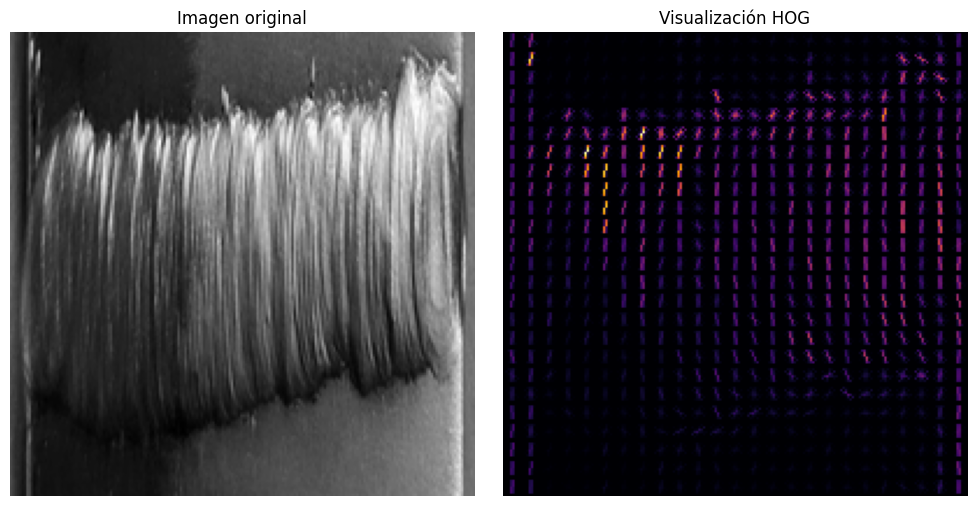

Longitud del vector HOG: 20736


In [ ]:
good_example = os.path.join(PROCESSED_GOOD_PATH, os.listdir(PROCESSED_GOOD_PATH)[0])
visualize_hog_example(good_example)

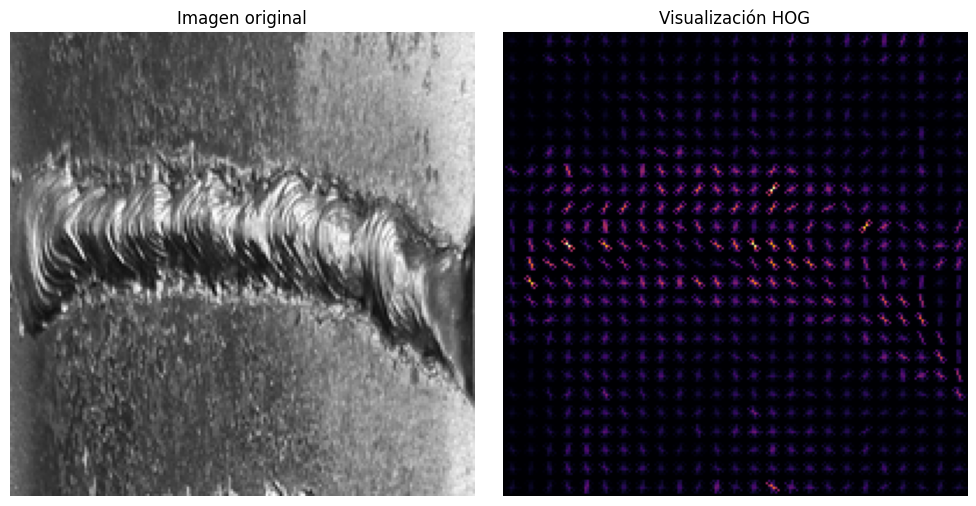

Longitud del vector HOG: 20736


In [ ]:
bad_example = os.path.join(PROCESSED_BAD_PATH, os.listdir(PROCESSED_BAD_PATH)[0])
visualize_hog_example(bad_example)

### **0.3. Reducción de la dimensionalidad**
----


En el tipo de análisis que queremos realizar para el caso del resultado del HOG, antes de buscar y eliminar valores duplicados, hay que entender estos valores como valores unicos propios de una imagen y en ese caso se justifica otro tratamiento de estos datos. Puntualmente, no tanto para valores duplicados, sino para valores similares, lo que proponemos es realizar una reducción de la dimensionalidad por medio de un análisis de componentes principales (PCA), para asi ahorrarnos el coste computacional de tomar todos los datos que produce el HOG.

Por lo tanto, para eso, proponemos realizar el siguiente codigo.

Dimensiones originales: (180, 20736)
Número de features HOG: 20736
Varianza explicada por los primeros componentes:
  Componente 1: 0.0894 (0.0894 acumulada)
  Componente 2: 0.0376 (0.1270 acumulada)
  Componente 3: 0.0318 (0.1588 acumulada)
  Componente 4: 0.0225 (0.1814 acumulada)
  Componente 5: 0.0191 (0.2005 acumulada)
  Componente 6: 0.0152 (0.2157 acumulada)
  Componente 7: 0.0131 (0.2288 acumulada)
  Componente 8: 0.0127 (0.2415 acumulada)
  Componente 9: 0.0112 (0.2527 acumulada)
  Componente 10: 0.0109 (0.2636 acumulada)

Componentes para 95.0% varianza: 160
 COMPONENTES ÓPTIMOS (MÉTODO DEL CODO): 9
Reducción dimensional: 20736 → 9
Reducción del 100.0%


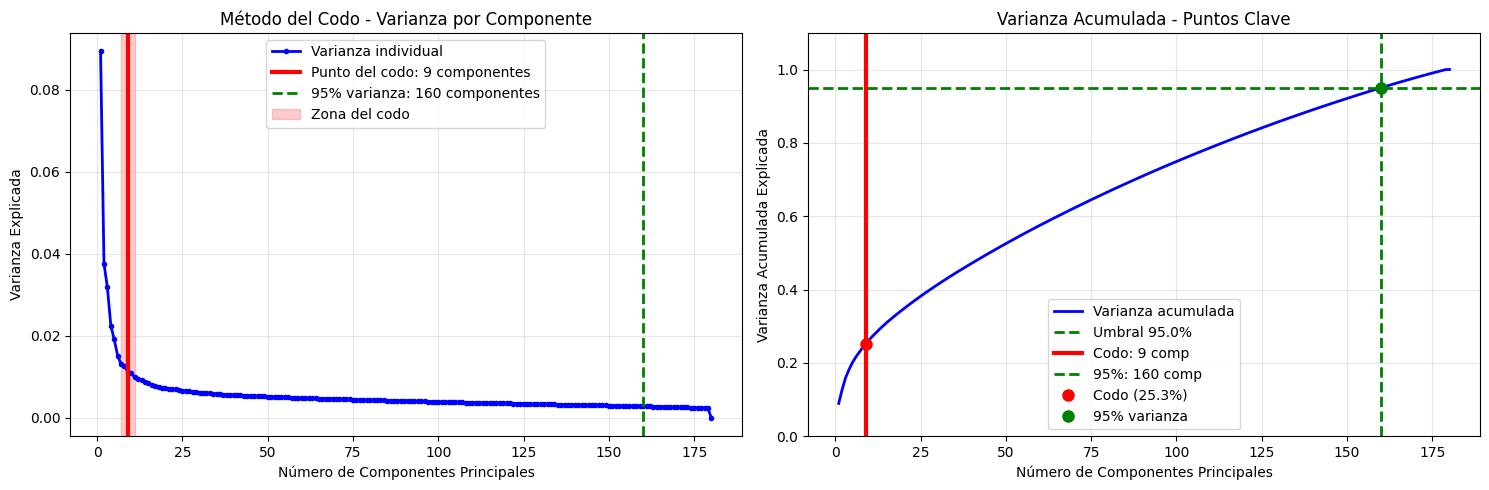

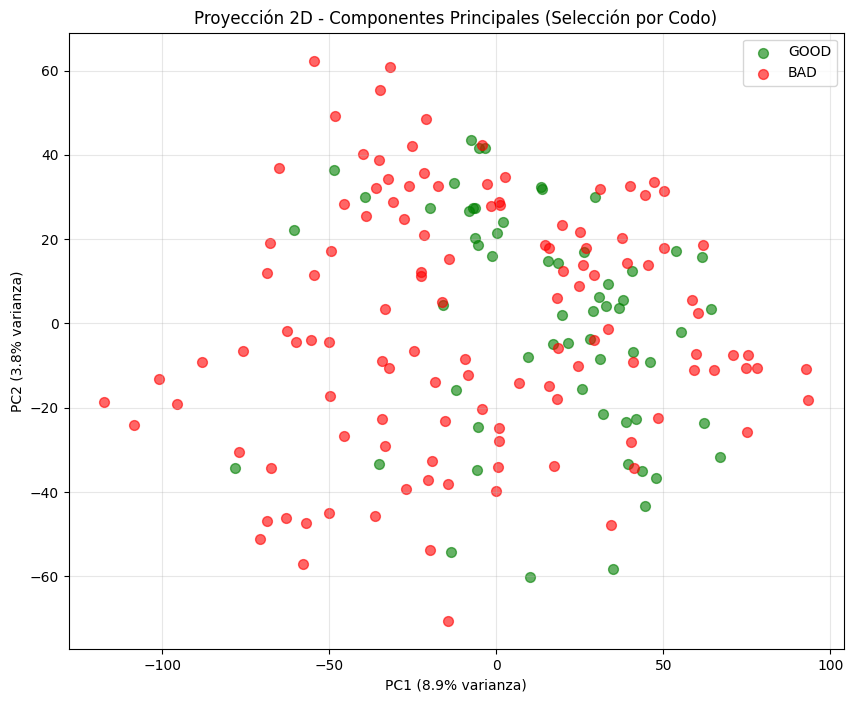

   COMPONENTES SELECCIONADOS: 9
   • Varianza explicada: 25.3%
   • Eficiencia: 9 componentes vs 160 para 95%

 El punto del codo representa donde los componentes adicionales
   aportan significativamente menos información nueva
   Componentes después del codo típicamente capturan ruido
   Esta selección optimiza el trade-off entre información y eficiencia
Dimensiones del dataset reducido: (180, 11)
Componentes PCA: 9
 Dataset optimizado usando método del codo para data science!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_hog_dimensionality_reduction(df, target_column='label', variance_threshold=0.95, plot_results=True):

    # 1. Separar features HOG y target
    hog_columns = [col for col in df.columns if col.startswith('hog_')]
    X = df[hog_columns]
    y = df[target_column] if target_column in df.columns else None


    print(f"Dimensiones originales: {X.shape}")
    print(f"Número de features HOG: {len(hog_columns)}")

    # 2. Estandarizar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. Aplicar PCA completo para análisis
    pca_full = PCA()
    X_pca_full = pca_full.fit_transform(X_scaled)

    # 4. Análisis de varianza explicada
    explained_variance = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # 5. Encontrar número óptimo de componentes usando método del codo
    n_components_95 = np.argmax(cumulative_variance >= variance_threshold) + 1
    if n_components_95 > len(explained_variance):
        n_components_95 = len(explained_variance)

    # Método del codo para data science
    elbow_components = find_elbow_point(explained_variance)

    print(f"Varianza explicada por los primeros componentes:")
    for i in range(min(10, len(explained_variance))):
        print(f"  Componente {i+1}: {explained_variance[i]:.4f} ({cumulative_variance[i]:.4f} acumulada)")

    print(f"\nComponentes para {variance_threshold*100}% varianza: {n_components_95}")
    print(f" COMPONENTES ÓPTIMOS (MÉTODO DEL CODO): {elbow_components}")
    print(f"Reducción dimensional: {len(hog_columns)} → {elbow_components}")
    print(f"Reducción del {((len(hog_columns) - elbow_components) / len(hog_columns)) * 100:.1f}%")

    # 6. Aplicar PCA con número óptimo de componentes (método del codo)
    pca_optimal = PCA(n_components=elbow_components)
    X_pca_optimal = pca_optimal.fit_transform(X_scaled)

    # 7. Crear DataFrame con componentes PCA
    pca_columns = [f'pca_{i+1}' for i in range(elbow_components)]
    df_pca = pd.DataFrame(X_pca_optimal, columns=pca_columns, index=df.index)

    # 8. Preservar información original importante
    if target_column in df.columns:
        df_pca[target_column] = y
    if 'filename' in df.columns:
        df_pca['filename'] = df['filename']

    # 9. Visualizaciones con método del codo
    if plot_results:
        plot_pca_analysis_with_elbow(explained_variance, cumulative_variance,
                                   n_components_95, elbow_components, variance_threshold)

        # Plot 2D if there are at least 2 components
        if elbow_components >= 2 and target_column in df.columns:
            plot_pca_2d(df_pca, target_column, pca_optimal)

    # 10. Información del análisis
    analysis_info = {
        'original_dimensions': X.shape[1],
        'components_95_variance': n_components_95,
        'elbow_components': elbow_components,
        'variance_threshold': variance_threshold,
        'explained_variance_ratio': pca_optimal.explained_variance_ratio_,
        'cumulative_variance': cumulative_variance,
        'total_variance_explained': cumulative_variance[elbow_components-1],
        'scaler': scaler,
        'pca_optimal': pca_optimal,
        'hog_columns': hog_columns
    }

    return df_pca, pca_optimal, analysis_info

def find_elbow_point(explained_variance):

    if len(explained_variance) < 5:
        return len(explained_variance)

    # Calcular la segunda derivada de la varianza explicada
    # El punto del codo es donde la segunda derivada es máxima (máxima curvatura)
    first_derivative = np.gradient(explained_variance)
    second_derivative = np.gradient(first_derivative)

    # Suavizar la segunda derivada para evitar ruido
    window_size = min(5, len(second_derivative) // 3)
    if window_size % 2 == 0:
        window_size += 1

    smoothed_second_deriv = np.convolve(second_derivative, np.ones(window_size)/window_size, mode='valid')

    # Encontrar el punto donde la segunda derivada es máxima (punto de inflexión)
    # Buscamos en los primeros 2/3 de los componentes para evitar el final de la curva
    search_limit = len(smoothed_second_deriv) * 2 // 3
    elbow_idx = np.argmax(smoothed_second_deriv[:search_limit])

    # Ajustar el índice debido a la convolución
    elbow_point = elbow_idx + window_size // 2 + 1

    # Asegurar un mínimo razonable de componentes
    min_components = max(3, len(explained_variance) // 20)
    elbow_point = max(elbow_point, min_components)

    # Asegurar un máximo razonable
    max_components = min(50, len(explained_variance) // 2)
    elbow_point = min(elbow_point, max_components)

    return elbow_point

def plot_pca_analysis_with_elbow(explained_variance, cumulative_variance, n_components_95, elbow_components, threshold):


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfico 1: Varianza explicada por componente con punto del codo
    components_range = range(1, len(explained_variance) + 1)

    # Línea principal
    ax1.plot(components_range, explained_variance, 'o-', linewidth=2, color='blue', markersize=3, label='Varianza individual')

    # Marcar el punto del codo
    ax1.axvline(x=elbow_components, color='red', linestyle='-', linewidth=3,
                label=f'Punto del codo: {elbow_components} componentes')

    # Marcar el 95% de varianza
    ax1.axvline(x=n_components_95, color='green', linestyle='--', linewidth=2,
                label=f'95% varianza: {n_components_95} componentes')

    # Destacar el área del codo
    ax1.axvspan(elbow_components-2, elbow_components+2, alpha=0.2, color='red', label='Zona del codo')

    ax1.set_xlabel('Número de Componentes Principales')
    ax1.set_ylabel('Varianza Explicada')
    ax1.set_title('Método del Codo - Varianza por Componente')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Varianza acumulada con puntos clave
    ax2.plot(components_range, cumulative_variance, 'b-', linewidth=2, label='Varianza acumulada')

    # Líneas de referencia
    ax2.axhline(y=threshold, color='green', linestyle='--', linewidth=2, label=f'Umbral {threshold*100}%')
    ax2.axvline(x=elbow_components, color='red', linestyle='-', linewidth=3,
                label=f'Codo: {elbow_components} comp')
    ax2.axvline(x=n_components_95, color='green', linestyle='--', linewidth=2,
                label=f'95%: {n_components_95} comp')

    # Puntos importantes
    variance_at_elbow = cumulative_variance[elbow_components-1]
    ax2.plot(elbow_components, variance_at_elbow, 'ro', markersize=8, label=f'Codo ({variance_at_elbow:.1%})')
    ax2.plot(n_components_95, threshold, 'go', markersize=8, label=f'95% varianza')

    ax2.set_xlabel('Número de Componentes Principales')
    ax2.set_ylabel('Varianza Acumulada Explicada')
    ax2.set_title('Varianza Acumulada - Puntos Clave')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1.1)

    plt.tight_layout()
    plt.show()

def plot_pca_2d(df_pca, target_column, pca_model):

    plt.figure(figsize=(10, 8))

    # Colores para diferentes clases
    colors = {'GOOD': 'green', 'BAD': 'red'} if target_column == 'label' else None

    if colors:
        for label, color in colors.items():
            mask = df_pca[target_column] == label
            plt.scatter(df_pca.loc[mask, 'pca_1'],
                       df_pca.loc[mask, 'pca_2'],
                       c=color, label=label, alpha=0.6, s=50)
    else:
        plt.scatter(df_pca['pca_1'], df_pca['pca_2'],
                   c=pd.factorize(df_pca[target_column])[0],
                   alpha=0.6, s=50, cmap='viridis')

    plt.xlabel(f'PC1 ({pca_model.explained_variance_ratio_[0]*100:.1f}% varianza)')
    plt.ylabel(f'PC2 ({pca_model.explained_variance_ratio_[1]*100:.1f}% varianza)')
    plt.title('Proyección 2D - Componentes Principales (Selección por Codo)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def explain_elbow_method(analysis_info):
    """Explica el método del codo y por qué es mejor"""

    print(f"   COMPONENTES SELECCIONADOS: {analysis_info['elbow_components']}")
    print(f"   • Varianza explicada: {analysis_info['total_variance_explained']:.1%}")
    print(f"   • Eficiencia: {analysis_info['elbow_components']} componentes vs {analysis_info['components_95_variance']} para 95%")


def complete_pca_analysis_pipeline(df_hog):
    """Pipeline completo de análisis PCA usando método del codo"""

    # 1. Análisis PCA principal
    df_pca, pca_model, analysis_info = pca_hog_dimensionality_reduction(
        df_hog,
        variance_threshold=0.95,
        plot_results=True
    )

    # 2. Explicación del método
    explain_elbow_method(analysis_info)

    # 3. Información adicional
    print(f"\n El punto del codo representa donde los componentes adicionales")
    print(f"   aportan significativamente menos información nueva")
    print(f"   Componentes después del codo típicamente capturan ruido")
    print(f"   Esta selección optimiza el trade-off entre información y eficiencia")

    return df_pca, pca_model, analysis_info

# USO PRÁCTICO
if __name__ == "__main__":
    # Ejecutar el análisis PCA completo
    df_pca_result, pca_model_result, analysis_info_result = complete_pca_analysis_pipeline(hog_df) #### Acá estan las variables declaradas con base en las cuales trabajar

    print(f"Dimensiones del dataset reducido: {df_pca_result.shape}")
    print(f"Componentes PCA: {analysis_info_result['elbow_components']}")
    print(f" Dataset optimizado usando método del codo para data science!")

Con base en este codigo podemos observar que luego de usar el método del codo con base en la varianza nos damos cuenta de que un punto optimo en cuanto al coste computacional sería el de tomar 9 componentes principales, mientras que se sugieren 160 componentes para captar el 95% de la varianza.

Al final, entonces, lo que tenemos luego del analisis del PCA es el siguiente dataset:

In [ ]:
df_pca_result.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,label,filename
0,41.821791,-22.746829,-5.518155,1.998514,-46.848363,-8.889425,-11.617564,-9.903533,10.074639,GOOD,1A8.png
1,61.462584,15.763104,-47.034697,-29.468247,-8.992371,-14.911717,4.650566,3.957466,15.138618,GOOD,1A1.png
2,30.854273,6.146121,10.023189,4.742633,-42.696510,17.473136,11.756384,3.638862,-10.173896,GOOD,1A9.png
3,37.923440,5.449567,-28.201888,43.585704,7.224286,-0.152299,12.118355,-2.260800,21.472354,GOOD,1A2.png
4,-13.594262,-54.186118,29.137780,28.103784,-22.372716,-22.205520,-13.271222,-33.104365,18.938908,GOOD,1A6.png


In [ ]:
df_pca_result.shape

(180, 11)

## **1. Selección y diseño de modelos**
---



En cuanto a la selección del modelo, en primer lugar, tras hacer una pequeña revisión bibliográfica nos encontramos con que el modelo de aprendizaje supervisado más completo y con mejor precisión para la clasificación de imágenes son las Redes Neuronales Convolucionales (CNNs) o ConvNets (Moreno Díaz-Alejo, 2024, pág 6). Sin embargo, eso corresponde con un modelo de Deep Learning. Por el momendo, intentando acercarnos a las calidad de los resultados de las CNNs, nuestra intención acá es utilizar modelos propias del Machine learning clásico aplicados a un problema de aprendizaje supervisado. La razon de esto ultimo reside en el hecho de que el conjunto de imagenes de las que disponemos ya presenta unas etiquetas desde las cuales podemos realizar el mencionado aprendizaje supervisado. En otras palabras, dado que nuestro problema es uno de clasificación de imagenes por medio de aprendizaje de maquina supervisado, propondremos dos modelos de machine learning: uno basado en redes neuronales artificiales y otro en Support Vector Machines (SVM).

El modelo SVM fue seleccionado por su efectividad en tareas de clasificación cuando las imágenes han sido previamente transformadas en vectores de características. En nuestro caso, las imágenes fueron procesadas mediante el HOG, representando los patrones estructurales y de textura de las soldaduras y posteriormente se aplicó un PCA para reducir la dimensionalidad del espacio de características. Con este enfoque obtenemos un equilibrio entre rendimiento computacional, interpretabilidad y precision, sin requerir el volumen de datos o los recursos computacionales que suponen un modelo de Deep Learning.


## **2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Entrene el modelo y consiga la combinación eficiente de hiperparámetros para obtener un rendimiento óptimo.

Es importante visualizar los resultados de manera clara y comprensible. Para esto, **se deben utilizar tablas y gráficos** que muestren cómo cambian las métricas de desempeño del proceso de entrenamiento en función de los hiperparámetros probados. Algunas herramientas visuales útiles incluyen las *curvas de aprendizaje* y las *curvas de validación,* que nos permiten comparar el rendimiento del modelo con diferentes ajustes de hiperparámetros.

Para dar inicio al entrenamiento del modelo en primer lugar debemos preparar los datos con los que trabajaremos. Para esto vamos a separar las variables de entrada de las variable objetivo, y dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba guardando una proporcion de 70% entrenamiento, 30% prueba.


In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (componentes PCA) y etiquetas
X = df_pca_result[[f'pca_{i}' for i in range(1, 10)]]
y = df_pca_result['label']

# Dividir en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)

Tamaño conjunto de entrenamiento: (126, 9)
Tamaño conjunto de prueba: (54, 9)


A continuación usaremos `GridSearchCV` para encontrar la mejor configuracion de hiperparametros para nuestro modelo. En el diccionario parametros se definen los valores a explorar para C (nivel de regularización), kernel (tipo de función que define la frontera de decisión) y gamma (grado de influencia de los puntos de entrenamiento en kernels no lineales).

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

parametros = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=parametros,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor accuracy promedio en validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros encontrados: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Mejor accuracy promedio en validación cruzada: 0.7938461538461539


Teniendo en cuenta los mejores hiperparametros encontrados, procedemos a entrenar el modelo.

In [ ]:
best_params = grid_search.best_params_

best_svm = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    gamma=best_params['gamma'],
    probability=True,
    random_state=42
)

best_svm.fit(X_train, y_train)

SVC(C=10, kernel='poly', probability=True, random_state=42)

## **3. Evaluación del modelo**
---

En esta sección debe reportar el desempeño del modelo sobre la partición de datos de pruebas (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC, matriz de confusión, etc.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio, etc.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin, etc.

Los resultados se deben presentar usando tablas y figuras además del análisis detallado respectivo.

Una vez obtenida la mejor configuración de hiperparametros para el modelo SVM se procede a evaluar su desempeño sobre el conjunto de datos de prueba. Esta etapa permite medir la capacidad del modelo para generalizar y clasificar correctamente nuevas imágenes de soldaduras no vistas durante el entrenamiento. Para ello, se utilizan métricas de clasificación supervisada como accuracy, precision, recall, f1-score y AUC, que brindan una visión integral del rendimiento del modelo. Adicionalmente, se incluye la matriz de confusión como herramienta visual que permite identificar los aciertos y errores de predicción entre las clases “GOOD” y “BAD”.

Reporte de clasificación:
              precision    recall  f1-score   support

         BAD       0.84      0.86      0.85        36
        GOOD       0.71      0.67      0.69        18

    accuracy                           0.80        54
   macro avg       0.77      0.76      0.77        54
weighted avg       0.79      0.80      0.79        54



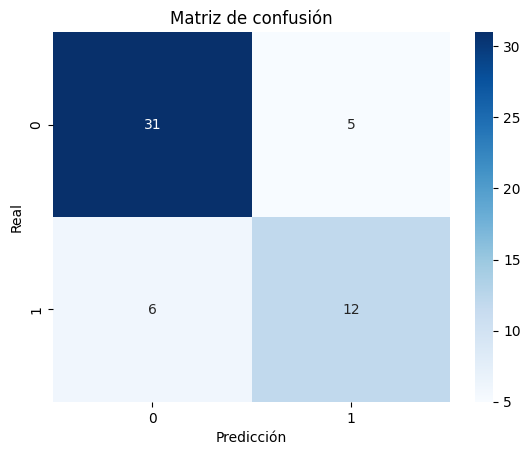

AUC: 0.829


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# Predicciones
y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:, 1]  # Para AUC (solo si son 2 clases)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

# AUC (si aplica)
try:
    auc = roc_auc_score(y_test.map({'BAD': 0, 'GOOD': 1}), y_prob)
    print(f"AUC: {auc:.3f}")
except Exception as e:
    print("No se pudo calcular AUC:", e)

Los resultados de la evaluación muestran que el modelo SVM con kernel polinómico (C=10, gamma='scale') logra un desempeño satisfactorio, alcanzando una exactitud global del 80%. El modelo presenta un rendimiento particularmente sólido en la detección de soldaduras “BAD”, con valores de precision y recall superiores al 0.83, mientras que su desempeño para la clase “GOOD” resulta algo menor, posiblemente debido a un menor número de ejemplos en esa categoría. No obstante, el equilibrio general reflejado en el f1-score y el valor de AUC evidencian que el modelo es capaz de distinguir de manera consistente entre soldaduras aceptables y defectuosas. En síntesis, el SVM demuestra ser una alternativa eficaz para este tipo de clasificación basada en características HOG reducidas mediante PCA.

Adicionalmente, la matriz de confusión evidencia que el modelo SVM logra una clasificación mayoritariamente correcta, identificando con alta precisión las soldaduras defectuosas. De las 36 soldaduras reales clasificadas como “BAD”, el modelo acierta en 31 y solo confunde 5 como “GOOD”, lo que demuestra una buena capacidad de detección de defectos. En cambio, para las 18 soldaduras “GOOD”, se observa una ligera disminución en el desempeño, con 12 aciertos y 6 errores, lo cual sugiere cierta dificultad para reconocer correctamente soldaduras de buena calidad.

## **4. Aplicación del modelo**
---

Una vez que haya entrenado y evaluado su modelo, es importante considerar cómo puede ser utilizado en un entorno práctico.

Intente analizar la capacidad del modelo para generalizar nuevos datos que no formaron parte del conjunto de entrenamiento o evaluación.

In [ ]:
# ---**INGRESE SU CÓDIGO**---

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*